In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and direc

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic")

In [3]:
#파일 불러오기
file_df = pd.read_csv('/content/sample_data/3.서울시 내국인 성별 연령대별(격자별).csv', encoding='cp949')
print(file_df.head())

       기준일자      격자_250 개인법인구분 성별     연령대    업종대분류  카드이용금액계  카드이용건수계
0  20230101  다사44aa47aa     개인  남  60_69세      제과점   332649       16
1  20230101  다사57aa54aa     개인  남  60_69세      편의점    98780       16
2  20230101  다사46ab48bb     개인  남  20_29세     기타요식   190619       27
3  20230101  다사62bb48ab     개인  남  30_39세      편의점   213579       37
4  20230101  다사52ab49aa     개인  여  30_39세  슈퍼마켓일반형   531384       64


In [4]:
print(file_df.info())
print('-' * 100)
print(file_df.describe())
print('=' * 100)
print(file_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기준일자     200 non-null    int64 
 1   격자_250   200 non-null    object
 2   개인법인구분   200 non-null    object
 3   성별       181 non-null    object
 4   연령대      181 non-null    object
 5   업종대분류    200 non-null    object
 6   카드이용금액계  200 non-null    int64 
 7   카드이용건수계  200 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.6+ KB
None
----------------------------------------------------------------------------------------------------
             기준일자       카드이용금액계      카드이용건수계
count       200.0  2.000000e+02   200.000000
mean   20230101.0  1.653992e+06    66.535000
std           0.0  8.195576e+06   344.137811
min    20230101.0  4.164800e+04     5.000000
25%    20230101.0  1.914200e+05    21.000000
50%    20230101.0  3.615085e+05    32.000000
75%    20230101.0  7.877180e+05    48.000000
max    20

In [5]:
#결측치
file_df.isnull().sum()

,0
기준일자,0
격자_250,0
개인법인구분,0
성별,19
연령대,19
업종대분류,0
카드이용금액계,0
카드이용건수계,0


In [6]:
#결측치 제거
dropna_df=file_df.dropna()
dropna_df.isnull().sum()

,0
기준일자,0
격자_250,0
개인법인구분,0
성별,0
연령대,0
업종대분류,0
카드이용금액계,0
카드이용건수계,0


In [7]:
#중복 데이터
dropna_df.duplicated().sum()

np.int64(0)

In [8]:
#중복데이터는 없음
dropdup_df=dropna_df.drop_duplicates()
dropdup_df.duplicated().sum()

np.int64(0)

In [9]:
dropdup_df['건당평균결제금액'] = file_df['카드이용금액계'] / file_df['카드이용건수계']

In [10]:
dropdup_df

,기준일자,격자_250,개인법인구분,성별,연령대,업종대분류,카드이용금액계,카드이용건수계,건당평균결제금액
0,20230101,다사44aa47aa,개인,남,60_69세,제과점,332649,16,20790.562500
1,20230101,다사57aa54aa,개인,남,60_69세,편의점,98780,16,6173.750000
2,20230101,다사46ab48bb,개인,남,20_29세,기타요식,190619,27,7059.962963
3,20230101,다사62bb48ab,개인,남,30_39세,편의점,213579,37,5772.405405
4,20230101,다사52ab49aa,개인,여,30_39세,슈퍼마켓일반형,531384,64,8302.875000
...,...,...,...,...,...,...,...,...,...
195,20230101,다사60bb53ab,개인,여,60_69세,슈퍼마켓일반형,784047,53,14793.339623
196,20230101,다사54ab52bb,개인,여,50_59세,수제용품점,571323,16,35707.687500
197,20230101,다사55ab48ab,개인,여,40_49세,편의점,230131,43,5351.883721
198,20230101,다사48ba58bb,개인,남,40_49세,기타요식,232267,48,4838.895833


In [11]:
dropdup_df['나이'] = dropdup_df['연령대'].str.extract(r'(\d+)', expand=False).astype(int)
print(dropdup_df.head())

       기준일자      격자_250 개인법인구분 성별     연령대    업종대분류  카드이용금액계  카드이용건수계  \
0  20230101  다사44aa47aa     개인  남  60_69세      제과점   332649       16   
1  20230101  다사57aa54aa     개인  남  60_69세      편의점    98780       16   
2  20230101  다사46ab48bb     개인  남  20_29세     기타요식   190619       27   
3  20230101  다사62bb48ab     개인  남  30_39세      편의점   213579       37   
4  20230101  다사52ab49aa     개인  여  30_39세  슈퍼마켓일반형   531384       64   

       건당평균결제금액  나이  
0  20790.562500  60  
1   6173.750000  60  
2   7059.962963  20  
3   5772.405405  30  
4   8302.875000  30  


In [12]:
numeric_cols=['나이', '카드이용금액계', '카드이용건수계','건당평균결제금액']
file_numeric=dropdup_df[numeric_cols]

z_scores=(file_numeric- file_numeric.mean()) / file_numeric.std()
print(z_scores.head())

         나이   카드이용금액계   카드이용건수계  건당평균결제금액
0  1.422029 -0.166500 -0.156242  0.001988
1  1.422029 -0.193685 -0.156242 -0.413663
2 -1.171294 -0.183009 -0.125798 -0.388462
3 -0.522963 -0.180341 -0.098121 -0.425076
4 -0.522963 -0.143399 -0.023395 -0.353118


<Axes: >

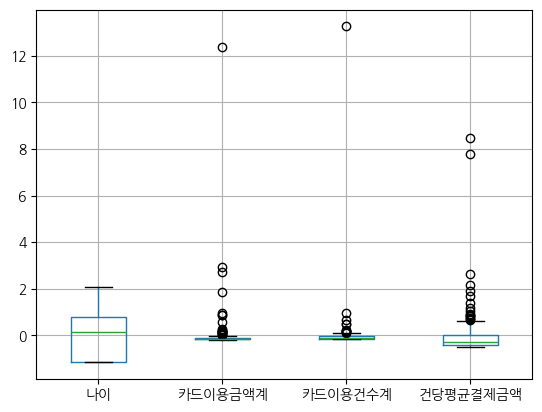

In [13]:
z_scores.boxplot()

In [14]:
outliers=(z_scores.abs() > 3).sum()
print(outliers)

나이          0
카드이용금액계     1
카드이용건수계     1
건당평균결제금액    2
dtype: int64


이상치 제거 전 데이터 크기: (181, 4)
이상치 제거 후 데이터 크기: (178, 4)


<Axes: >

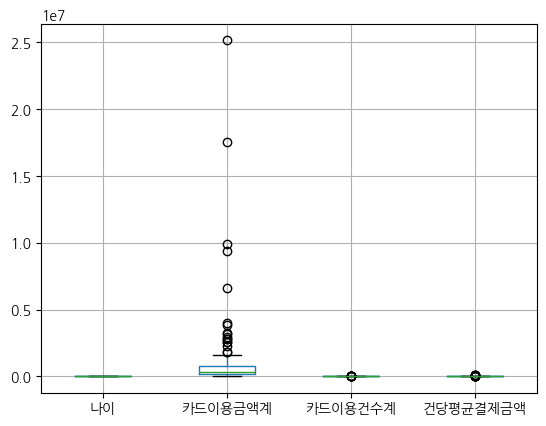

In [15]:
zscore_df=file_numeric
z_scores=(zscore_df - zscore_df.mean()) / zscore_df.std()
zscore_df= zscore_df[(z_scores.abs() < 3).all(axis=1)]

print(f'이상치 제거 전 데이터 크기: {file_numeric.shape}')
print(f'이상치 제거 후 데이터 크기: {zscore_df.shape}')
zscore_df.boxplot()

In [16]:
Q1=file_numeric.quantile(0.25)  #1사분위(Q1)
Q3=file_numeric.quantile(0.75) #3사분위(Q3)
IQR= Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers=(file_numeric < lower_bound) | (file_numeric > upper_bound)
print(outliers.sum())

나이           0
카드이용금액계     20
카드이용건수계     11
건당평균결제금액    16
dtype: int64


IQR로 이상치 제거 전 데이터 크기: (178, 4)
IQR로 이상치 제거 후 데이터 크기: (152, 4)


<Axes: >

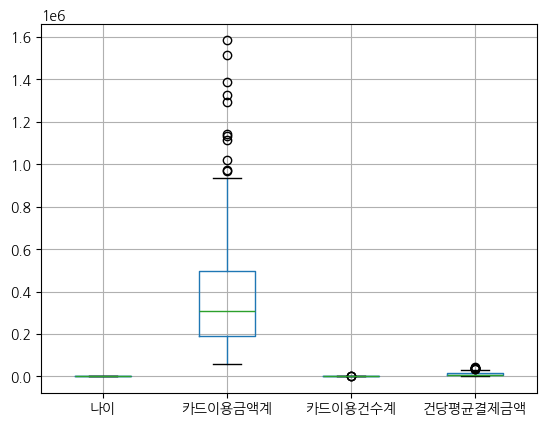

In [17]:
# 이상치가 있는 행 제거
file_no_outliers = file_numeric[~outliers.any(axis=1)]

# 박스플롯 보기

print(f'IQR로 이상치 제거 전 데이터 크기: {zscore_df.shape}')
print(f'IQR로 이상치 제거 후 데이터 크기: {file_no_outliers.shape}')
file_no_outliers.boxplot()

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard=StandardScaler()
file_standard=scaler_standard.fit_transform(zscore_df[['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액']])

scaler_minmax=MinMaxScaler()
file_minmax=scaler_minmax.fit_transform(zscore_df[['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액']])

In [19]:
import pandas as pd
standard_df=pd.DataFrame(file_standard, columns=['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액'])
minmax_df=pd.DataFrame(file_minmax, columns=['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액'])

print("StandardScaler 결과")
print(standard_df.describe())

print(' '*50)
print("="* 50)
print("MinMaxScaler 결과")
print(minmax_df.describe())

StandardScaler 결과
                 나이       카드이용금액계       카드이용건수계      건당평균결제금액
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02
mean  -1.521879e-16  1.637267e-17 -6.237208e-17  5.488743e-17
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00
min   -1.167280e+00 -3.622859e-01 -6.179693e-01 -8.326471e-01
25%   -1.167280e+00 -3.055427e-01 -5.139026e-01 -6.276068e-01
50%    1.232531e-01 -2.407185e-01 -2.849558e-01 -4.131649e-01
75%    7.685196e-01 -7.980529e-02  1.261078e-01  1.998034e-01
max    2.059053e+00  9.493778e+00  7.603303e+00  5.350719e+00
                                                  
MinMaxScaler 결과
               나이     카드이용금액계     카드이용건수계    건당평균결제금액
count  178.000000  178.000000  178.000000  178.000000
mean     0.361798    0.036758    0.075167    0.134659
std      0.310824    0.101747    0.121979    0.162180
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.005757    0.012658    0.033160
50%      0.400000    0.012334    

In [21]:
from sklearn.preprocessing import LabelEncoder

labeling_df=dropdup_df[['성별', '개인법인구분']]
file_one_hot=pd.get_dummies(labeling_df, columns=['성별', '개인법인구분'])

encoder=LabelEncoder()
labeling_df['sex_label']=encoder.fit_transform(labeling_df['성별'])
labeling_df['entity_label']=encoder.fit_transform(labeling_df['개인법인구분'])

print("pd.get_dummies() 결과")
print(file_one_hot.head())
print('=' * 100)
print("Label Encoding 결과")
print(labeling_df[['성별', 'sex_label', '개인법인구분', 'entity_label']].head())

pd.get_dummies() 결과
    성별_남   성별_여  개인법인구분_개인
0   True  False       True
1   True  False       True
2   True  False       True
3   True  False       True
4  False   True       True
Label Encoding 결과
  성별  sex_label 개인법인구분  entity_label
0  남          0     개인             0
1  남          0     개인             0
2  남          0     개인             0
3  남          0     개인             0
4  여          1     개인             0


<ipython-input-21-c0d0b1536ac4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeling_df['sex_label']=encoder.fit_transform(labeling_df['성별'])
<ipython-input-21-c0d0b1536ac4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeling_df['entity_label']=encoder.fit_transform(labeling_df['개인법인구분'])


In [22]:
import numpy as np

log_df=pd.DataFrame(zscore_df[['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액']])

log_df[['나이_log', '카드이용금액계_log', '카드이용건수계_log','건당평균결제금액_log']]=np.log1p(zscore_df[['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액']])

print(log_df.head())
print(" ")

titanic_standard=scaler_standard.fit_transform(log_df[['나이_log', '카드이용금액계_log', '카드이용건수계_log','건당평균결제금액_log']])
standard_log_df=pd.DataFrame(file_standard, columns=['나이_st', '카드이용금액계_st', '카드이용건수계_st','건당평균결제금액_st'])
print(standard_log_df.head())

   나이  카드이용금액계  카드이용건수계      건당평균결제금액    나이_log  카드이용금액계_log  카드이용건수계_log  \
0  60   332649       16  20790.562500  4.110874    12.714846     2.833213   
1  60    98780       16   6173.750000  4.110874    11.500661     2.833213   
2  20   190619       27   7059.962963  3.044522    12.158037     3.332205   
3  30   213579       37   5772.405405  3.433987    12.271767     3.637586   
4  30   531384       64   8302.875000  3.433987    13.183242     4.174387   

   건당평균결제금액_log  
0      9.942303  
1      8.728224  
2      8.862337  
3      8.661017  
4      9.024478  
 
      나이_st  카드이용금액계_st  카드이용건수계_st  건당평균결제금액_st
0  1.413786   -0.254678   -0.617969     0.183730
1  1.413786   -0.346554   -0.617969    -0.632578
2 -1.167280   -0.310475   -0.389023    -0.583086
3 -0.522013   -0.301455   -0.180889    -0.654992
4 -0.522013   -0.176605    0.381071    -0.513672


In [23]:
from scipy.stats import boxcox

boxcox_df=pd.DataFrame(dropdup_df['건당평균결제금액'])

건당평균결제금액_nonzero=boxcox_df['건당평균결제금액'] + 1
건당평균결제금액_boxcox, lambda_value=boxcox(건당평균결제금액_nonzero)

boxcox_df['건당평균결제금액_boxcox']=건당평균결제금액_boxcox
boxcox_df.head()

,건당평균결제금액,건당평균결제금액_boxcox
0,20790.562500,2.804685
1,6173.750000,2.755853
2,7059.962963,2.762305
3,5772.405405,2.752506
4,8302.875000,2.769717


In [24]:
file_numeric

,나이,카드이용금액계,카드이용건수계,건당평균결제금액
0,60,332649,16,20790.562500
1,60,98780,16,6173.750000
2,20,190619,27,7059.962963
3,30,213579,37,5772.405405
4,30,531384,64,8302.875000
...,...,...,...,...
195,60,784047,53,14793.339623
196,50,571323,16,35707.687500
197,40,230131,43,5351.883721
198,40,232267,48,4838.895833


                나이   카드이용금액계   카드이용건수계  건당평균결제금액
나이        1.000000  0.052817  0.007505  0.110854
카드이용금액계   0.052817  1.000000  0.950842  0.271885
카드이용건수계   0.007505  0.950842  1.000000  0.020874
건당평균결제금액  0.110854  0.271885  0.020874  1.000000


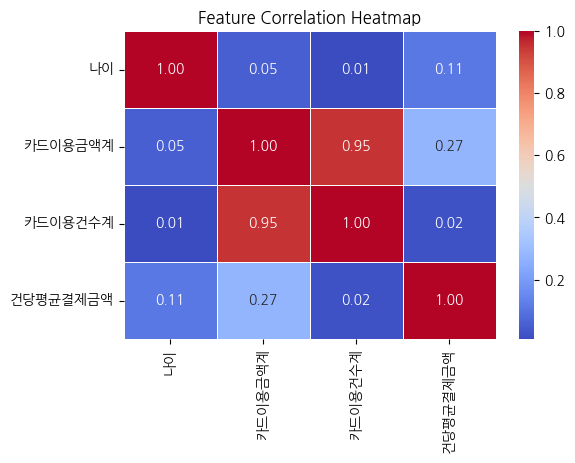

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=file_numeric.corr()
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
standard_log_df

,나이_st,카드이용금액계_st,카드이용건수계_st,건당평균결제금액_st
0,1.413786,-0.254678,-0.617969,0.183730
1,1.413786,-0.346554,-0.617969,-0.632578
2,-1.167280,-0.310475,-0.389023,-0.583086
3,-0.522013,-0.301455,-0.180889,-0.654992
4,-0.522013,-0.176605,0.381071,-0.513672
...,...,...,...,...
173,1.413786,-0.077346,0.152125,-0.151198
174,0.768520,-0.160915,-0.617969,1.016809
175,0.123253,-0.294952,-0.056009,-0.678477
176,0.123253,-0.294113,0.048058,-0.707126


In [27]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
titanic_pca=pca.fit_transform(standard_log_df)

pca_df=pd.DataFrame(titanic_pca, columns=['PC1', 'PC2'])

print(standard_log_df.head())
print(pca_df.head())

      나이_st  카드이용금액계_st  카드이용건수계_st  건당평균결제금액_st
0  1.413786   -0.254678   -0.617969     0.183730
1  1.413786   -0.346554   -0.617969    -0.632578
2 -1.167280   -0.310475   -0.389023    -0.583086
3 -0.522013   -0.301455   -0.180889    -0.654992
4 -0.522013   -0.176605    0.381071    -0.513672
        PC1       PC2
0 -0.160852  1.513623
1 -0.606151  1.218721
2 -0.913891 -0.954926
3 -0.705380 -0.550407
4 -0.243685 -0.755632


In [29]:
not_processed_df=dropdup_df[['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액']]

pca=PCA(n_components=2)
np_titanic_pca=pca.fit_transform(not_processed_df)

np_pca_df=pd.DataFrame(np_titanic_pca, columns=['PC1', 'PC2'])

print(not_processed_df.head())
print(np_pca_df.head())

   나이  카드이용금액계  카드이용건수계      건당평균결제금액
0  60   332649       16  20790.562500
1  60    98780       16   6173.750000
2  20   190619       27   7059.962963
3  30   213579       37   5772.405405
4  30   531384       64   8302.875000
            PC1           PC2
0 -1.432388e+06   1661.860268
1 -1.666273e+06 -12694.997463
2 -1.574433e+06 -11910.878188
3 -1.551474e+06 -13223.971468
4 -1.233667e+06 -11046.755092


In [30]:
print(dropdup_df.columns)
print(zscore_df.columns)

Index(['기준일자', '격자_250', '개인법인구분', '성별', '연령대', '업종대분류', '카드이용금액계', '카드이용건수계',
       '건당평균결제금액', '나이'],
      dtype='object')
Index(['나이', '카드이용금액계', '카드이용건수계', '건당평균결제금액'], dtype='object')


In [31]:
zscore_df['성별']=labeling_df['sex_label']
zscore_df.head()

<ipython-input-31-d3ab23654c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscore_df['성별']=labeling_df['sex_label']


,나이,카드이용금액계,카드이용건수계,건당평균결제금액,성별
0,60,332649,16,20790.562500,0
1,60,98780,16,6173.750000,0
2,20,190619,27,7059.962963,0
3,30,213579,37,5772.405405,0
4,30,531384,64,8302.875000,1


In [32]:
dropdup_df['성별']=labeling_df['sex_label']
dropdup_df.head()

,기준일자,격자_250,개인법인구분,성별,연령대,업종대분류,카드이용금액계,카드이용건수계,건당평균결제금액,나이
0,20230101,다사44aa47aa,개인,0,60_69세,제과점,332649,16,20790.562500,60
1,20230101,다사57aa54aa,개인,0,60_69세,편의점,98780,16,6173.750000,60
2,20230101,다사46ab48bb,개인,0,20_29세,기타요식,190619,27,7059.962963,20
3,20230101,다사62bb48ab,개인,0,30_39세,편의점,213579,37,5772.405405,30
4,20230101,다사52ab49aa,개인,1,30_39세,슈퍼마켓일반형,531384,64,8302.875000,30


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


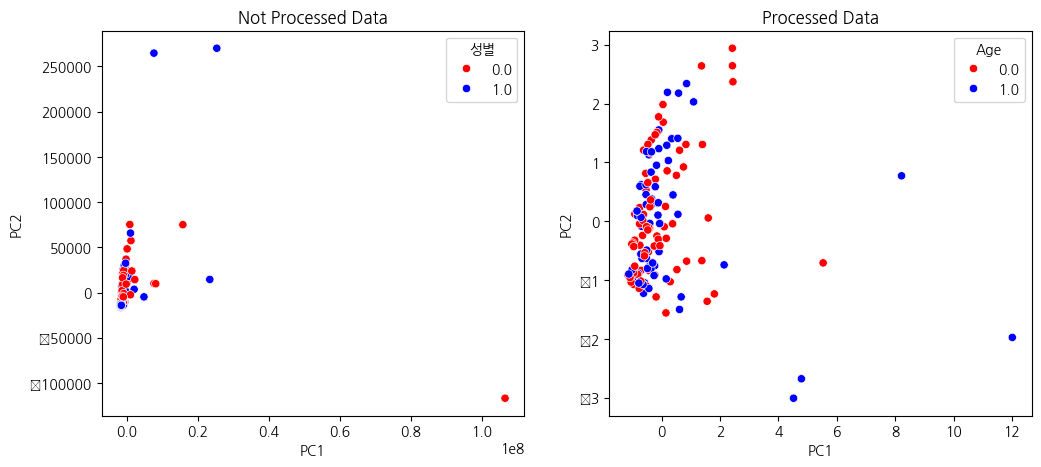

In [33]:
fig, axes=plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=np_pca_df['PC1'], y=np_pca_df['PC2'], hue=dropdup_df['성별'], palette=['red', 'blue'], ax=axes[0])
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=zscore_df['성별'], palette=['red', 'blue'], ax=axes[1])

axes[0].set_title("Not Processed Data")
axes[1].set_title("Processed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Age")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X=np_titanic_pca
y=dropdup_df['성별']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

144 37
144 37


In [35]:
from imblearn.over_sampling import SMOTE
print(f"SMOTE 적용 전 학습 데이터 크기: {X.shape}, {y.shape}")
print(y.value_counts())

smote=SMOTE(random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train.squeeze())

print("=" * 70)
print(" ")

print(f"SMOTE 적용 후 학습 데이터 크기: {X_train_smote.shape}, {y_train_smote.shape}")
print(y_train_smote.value_counts())

SMOTE 적용 전 학습 데이터 크기: (181, 2), (181,)
성별
0    96
1    85
Name: count, dtype: int64
 
SMOTE 적용 후 학습 데이터 크기: (152, 2), (152,)
성별
1    76
0    76
Name: count, dtype: int64


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("전처리 전 모델 정확도:", accuracy_score(y_test, y_pred))
print("분류 보고서:\n", classification_report(y_test, y_pred))

전처리 전 모델 정확도: 0.4864864864864865
분류 보고서:
               precision    recall  f1-score   support

           0       0.60      0.15      0.24        20
           1       0.47      0.88      0.61        17

    accuracy                           0.49        37
   macro avg       0.53      0.52      0.43        37
weighted avg       0.54      0.49      0.41        37



In [37]:
X=pca_df
y=zscore_df['성별']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

print("="* 70)
print(" ")

print(f"SMOTE 적용 전 학습 데이터 크기: {X.shape}, {y.shape}")
print(y.value_counts())

X_train_df=pd.DataFrame(X_train)
y_train_df=pd.DataFrame(y_train)

smote=SMOTE(random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train_df, y_train_df.squeeze())

print(" ")

print(f"SMOTE 적용 후 학습 데이터 크기: {X_train_smote.shape}, {y_train_smote.shape}")
print(y_train_smote.value_counts())


print("="* 70)
print(" ")

model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("전처리 후 모델 정확도:", accuracy_score(y_test, y_pred))
print("분류 보고서:\n", classification_report(y_test, y_pred))

142 36
142 36
 
SMOTE 적용 전 학습 데이터 크기: (178, 2), (178,)
성별
0    94
1    84
Name: count, dtype: int64
 
SMOTE 적용 후 학습 데이터 크기: (148, 2), (148,)
성별
1    74
0    74
Name: count, dtype: int64
 
전처리 후 모델 정확도: 0.5277777777777778
분류 보고서:
               precision    recall  f1-score   support

           0       0.55      0.85      0.67        20
           1       0.40      0.12      0.19        16

    accuracy                           0.53        36
   macro avg       0.47      0.49      0.43        36
weighted avg       0.48      0.53      0.46        36

